# IBM Data Science Capstone Project

## Car Accident Severity Prediction

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, classification_report, confusion_matrix, log_loss
print("Libraries imported successfully")


Libraries imported successfully


### Reading Data

In [2]:
df = pd.read_csv("../Data/Data-Collisions.csv")

C:\Users\vedan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
column_subset = ["SEVERITYCODE", "ADDRTYPE", "INATTENTIONIND", 
                 "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND", 
                 "JUNCTIONTYPE", "SPEEDING", "PERSONCOUNT", "VEHCOUNT"]

In [6]:
df = df[column_subset]
df.head()

,SEVERITYCODE,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,SPEEDING,PERSONCOUNT,VEHCOUNT
0,2,Intersection,NaN,N,Overcast,Wet,Daylight,At Intersection (intersection related),NaN,2,2
1,1,Block,NaN,0,Raining,Wet,Dark - Street Lights On,Mid-Block (not related to intersection),NaN,2,2
2,1,Block,NaN,0,Overcast,Dry,Daylight,Mid-Block (not related to intersection),NaN,4,3
3,1,Block,NaN,N,Clear,Dry,Daylight,Mid-Block (not related to intersection),NaN,3,3
4,2,Intersection,NaN,0,Raining,Wet,Daylight,At Intersection (intersection related),NaN,2,2


In [7]:
df.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
JUNCTIONTYPE      object
SPEEDING          object
PERSONCOUNT        int64
VEHCOUNT           int64
dtype: object

### Transforming Data

#### Transform Target Variable

In [8]:
code_encoder = preprocessing.LabelEncoder()
code_encoder.fit([1, 2])
df["SEVERITYCODE"] = code_encoder.transform(df["SEVERITYCODE"].values)

In [9]:
df.describe(include = "all")

,SEVERITYCODE,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,SPEEDING,PERSONCOUNT,VEHCOUNT
count,194673.000000,192747,29805,189789,189592,189661,189503,188344,9333,194673.000000,194673.000000
unique,NaN,3,1,4,11,9,9,7,1,NaN,NaN
top,NaN,Block,Y,N,Clear,Dry,Daylight,Mid-Block (not related to intersection),Y,NaN,NaN
freq,NaN,126926,29805,100274,111135,124510,116137,89800,9333,NaN,NaN
mean,0.298901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.444427,1.920780
std,0.457778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.345929,0.631047
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000


#### Encoding Attention of Driver

In [10]:
print(df["INATTENTIONIND"].unique())
df["INATTENTIONIND"] = df["INATTENTIONIND"].apply(lambda val: 1 if val == 'Y' else 0)
df["INATTENTIONIND"].replace([np.nan], 0, inplace = True)
df["UNDERINFL"].replace(["Y"], 1, inplace = True)

[nan 'Y']


#### Encoding Driver under Influence

In [11]:
print(df["UNDERINFL"].unique())
df["UNDERINFL"].replace(["N","0",np.nan], 0, inplace = True)
df["UNDERINFL"].replace(["1","Y"], 1, inplace = True)

['N' '0' nan '1' 1]


#### Encoding Car Speeding

In [12]:
print(df["SPEEDING"].unique())
df["SPEEDING"].replace([np.nan], 0, inplace = True)
df["SPEEDING"].replace(["Y"], 1, inplace = True)

[nan 'Y']


#### Encoding Light Condition

In [13]:
print(df["LIGHTCOND"].unique())
df["LIGHTCOND"].replace(["Daylight"], "Daylight", inplace = True)
df["LIGHTCOND"].replace(["Dusk", "Dawn", "Dark - Street Lights On"], "Dark", inplace = True)
df["LIGHTCOND"].replace(["Dark - No Street Lights", "Dark - Street Lights Off", "Dark - Unknown Lighting"], "Dark - No lights", inplace = True)
df["LIGHTCOND"].replace(["Unknown", "Other", np.nan], "Unknown", inplace = True)

['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


#### Enoding Weather

In [14]:
print(df["WEATHER"].unique())
df["WEATHER"].replace(["Clear"], "Clear", inplace = True)
df["WEATHER"].replace(["Overcast", "Fog/Smog/Smoke", "Partly Cloudy"], "Cloudy", inplace = True)
df["WEATHER"].replace(["Blowing Sand/Dirt", "Severe Crosswind"], "Windy", inplace = True)
df["WEATHER"].replace(["Raining", "Snowing", "Sleet/Hail/Freezing Rain"], "Pouring", inplace = True)
df["WEATHER"].replace(["Unknown", "Other", np.nan], "Unknown", inplace = True)

['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']


#### Encoding Road Condition

In [15]:
print(df["ROADCOND"].unique())
df["ROADCOND"].replace(["Dry"], "Dry Road", inplace = True)
df["ROADCOND"].replace(["Wet", "Standing Water", "Oil"], "Wet Road", inplace = True)
df["ROADCOND"].replace(["Ice", "Snow/Slush", "Sand/Mud/Dirt"], "Blocked Road", inplace = True)
df["ROADCOND"].replace(["Unknown", "Other", np.nan], "Unknown", inplace = True)

['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']


#### Encoding Junction Type

In [16]:
print(df["JUNCTIONTYPE"].unique())
df["JUNCTIONTYPE"].replace(["Mid-Block (not related to intersection)",
                           "At Intersection (but not related to intersection)", "Unknown", np.nan], 0, inplace = True)
df["JUNCTIONTYPE"].replace(["At Intersection (intersection related)", 
                            "Mid-Block (but intersection related)",
                           "Driveway Junction", "Ramp Junction"], 1, inplace = True)

['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction']


In [17]:
df.dtypes


SEVERITYCODE       int64
ADDRTYPE          object
INATTENTIONIND     int64
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
JUNCTIONTYPE       int64
SPEEDING           int64
PERSONCOUNT        int64
VEHCOUNT           int64
dtype: object

In [18]:
df.head()

,SEVERITYCODE,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,SPEEDING,PERSONCOUNT,VEHCOUNT
0,1,Intersection,0,0,Cloudy,Wet Road,Daylight,1,0,2,2
1,0,Block,0,0,Pouring,Wet Road,Dark,0,0,2,2
2,0,Block,0,0,Cloudy,Dry Road,Daylight,0,0,4,3
3,0,Block,0,0,Clear,Dry Road,Daylight,0,0,3,3
4,1,Intersection,0,0,Pouring,Wet Road,Daylight,1,0,2,2


#### Creating Dummy variables for Categorical Variables

In [19]:
data = pd.get_dummies(data = df)
data.head()

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,JUNCTIONTYPE,SPEEDING,PERSONCOUNT,VEHCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,...,WEATHER_Unknown,WEATHER_Windy,ROADCOND_Blocked Road,ROADCOND_Dry Road,ROADCOND_Unknown,ROADCOND_Wet Road,LIGHTCOND_Dark,LIGHTCOND_Dark - No lights,LIGHTCOND_Daylight,LIGHTCOND_Unknown
0,1,0,0,1,0,2,2,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,2,2,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,4,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,3,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,1,0,2,2,0,0,1,...,0,0,0,0,0,1,0,0,1,0


### Building Model

In [20]:
y = data["SEVERITYCODE"].values
X = data.drop("SEVERITYCODE", axis = 1)
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1209)
os = SMOTE(random_state=0)
X_train, y_train = os.fit_sample(X_train, y_train)

#### Logistic Regression

In [30]:
LR = LogisticRegression(C = 0.01, solver = "liblinear")
LR.fit(X_train, y_train)
yhatLR = LR.predict(X_test)
yhat_proba = LR.predict_proba(X_test)
print("Accuracy Score:", accuracy_score(y_test, yhatLR))
print("F1 Score:", f1_score(y_test, yhatLR))
print("Log Loss:", log_loss(y_test, yhat_proba))
print("Clasification Report:\n", classification_report(y_test, yhatLR))
confusion_matrix(y_test, yhatLR)


Accuracy Score: 0.63850006420958
F1 Score: 0.5240912933220624
Log Loss: 0.6311264004171047
Clasification Report:
               precision    recall  f1-score   support

           0       0.82      0.63      0.71     27345
           1       0.43      0.67      0.52     11590

    accuracy                           0.64     38935
   macro avg       0.62      0.65      0.62     38935
weighted avg       0.70      0.64      0.65     38935



array([[17110, 10235],
       [ 3840,  7750]], dtype=int64)

#### Decision Tree Classifier

In [24]:
dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
dtree.fit(X_train, y_train)
yhatDT = dtree.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, yhatDT))
print("F1 Score:", f1_score(y_test, yhatDT))
print("Clasification Report:\n", classification_report(y_test, yhatDT))


Accuracy Score: 0.6251701553871838
F1 Score: 0.5417033036050747
Clasification Report:
               precision    recall  f1-score   support

           0       0.84      0.57      0.68     27345
           1       0.43      0.74      0.54     11590

    accuracy                           0.63     38935
   macro avg       0.63      0.66      0.61     38935
weighted avg       0.72      0.63      0.64     38935



In [23]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 8625  2965]
 [11629 15716]]


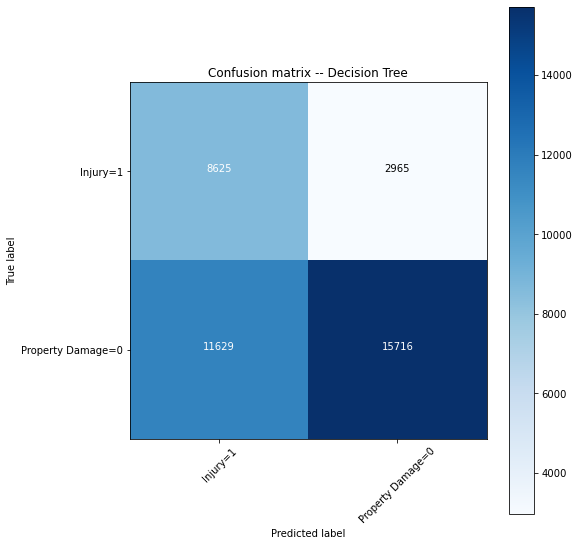

In [29]:
#Plot it
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix -- Decision Tree')

Confusion matrix, without normalization
[[ 8625  2965]
 [11629 15716]]


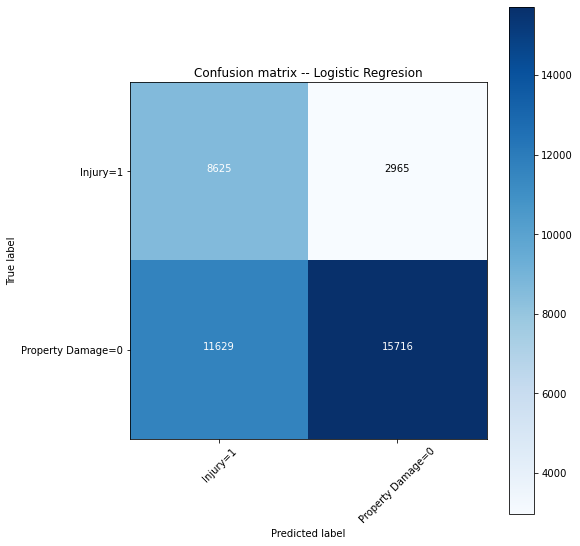

In [31]:
#Plot it
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix -- Logistic Regresion')

In [32]:
LR

LogisticRegression(C=0.01, solver='liblinear')

In [34]:
dtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)